In [25]:
import sys
sys.path.insert(0, "../lib")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def get_accuracy(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    metrics= y_real==y_pred
    accuracy =(np.sum(metrics)*100.0)/len(metrics)
    #print "accruracy "+"{:10.4f}".format(accuracy) +"%"
    return "{:10.4f}".format(accuracy)+"%"


In [114]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def get_precision(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    return " "+"{:10.4f}".format(precision_score(y_real,y_pred,average='micro'))

def get_recall(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    return " "+"{:10.4f}".format(recall_score(y_real,y_pred,average='micro'))

def get_fscore(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    return " "+"{:10.4f}".format(f1_score(y_real, y_pred, average='micro'))

def get_confusion_matrix(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    return confusion_matrix(np.array(y_real),np.array(y_pred))

def get_accuracy_scikit_learn(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    print accuracy_score(y_real, y_pred)


In [35]:
import pickle
path="/Users/luispeinado/Downloads/evaluate_seq2_vs_all.pkl"
data_evaluate2= pickle.load( open( path, "rb" ) )


def load_result(path):
    return pickle.load( open( path, "rb" ) )

In [18]:
seq_model_label=['seq2_model']
seq_dataset_label=['seq1','seq2','seq3','seq4','seq5']

model secuence1
 seq1:    32.6078% precision :      0.3261 recall      0.3261


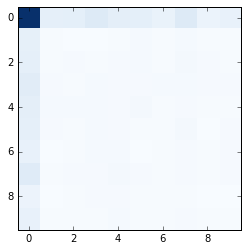

In [113]:
len_data_evaluate_model=len(data_evaluate2)



for i in range(0,len_data_evaluate_model):
    len_dataset_evaluate=len(data_evaluate2[i])
    seq_for_model=data_evaluate2[i]
    print "model "+seq_model_label[i]
    result_line=""
    for j in range(0,len_dataset_evaluate):
        result_line=" "+seq_dataset_label[j]+": "+(get_accuracy(np.array(seq_for_model[j])))+" precision : "+(get_precision(np.array(seq_for_model[j])))+" recall "+(get_recall(np.array(seq_for_model[j])))
        get_fscore(np.array(seq_for_model[j]))
        print result_line
        get_accuracy_scikit_learn(np.array(seq_for_model[j]))
        confusion_matrix= get_confusion_matrix(np.array(seq_for_model[j]))
        
        plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)

In [121]:
def evaluate(data_evaluate2,seq_model_label,seq_dataset_label,labels):
    len_data_evaluate_model=len(data_evaluate2)
    for i in range(0,len_data_evaluate_model):
        len_dataset_evaluate=len(data_evaluate2[i])
        seq_for_model=data_evaluate2[i]
        print "model "+seq_model_label[i]
        result_line=""
        fig =plt.figure(figsize=(12,12 ))
        fig.suptitle('Model Training with '+seq_model_label[i], fontsize=12, fontweight='bold')
        for j in range(0,len_dataset_evaluate):
            result_line=" "+seq_dataset_label[j]+": "+(get_accuracy(np.array(seq_for_model[j])))+" precision : "+(get_precision(np.array(seq_for_model[j])))+" recall "+(get_recall(np.array(seq_for_model[j]))) +" f1_score "+(get_fscore(np.array(seq_for_model[j])))
            print result_line
            get_accuracy_scikit_learn(np.array(seq_for_model[j]))
            confusion_matrix= get_confusion_matrix(np.array(seq_for_model[j])) 
            plt.subplot(3,3,j+1)
            plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
            tick_marks = np.arange(len(labels))
            plt.xticks(tick_marks, labels, rotation=90)
            plt.yticks(tick_marks, labels)
            plt.title(seq_dataset_label[j])
            plt.subplots_adjust(top=1.2)
            plt.tight_layout()


# 1 experimento todos contra todos 
## 1.1 size of batch 25 
Se testean todos las secuencias contra todas las secuencias con un batch de 25 

In [83]:
### labels

class_labels=['Corridor','Hall','ProfessorOffice','StudentOffice','TechnicalRoom','Toilet'
              ,'SecretaryOffice','VideoConferenceRoom','Warehouse','ElevatorArea']
              

In [65]:
path="../data/results/evaluate_all_vs_all.pkl"
Y= load_result(path)
type(Y)

numpy.ndarray

model secuence1
 seq1:    27.2918% precision :      0.2729 recall      0.2729 f1_score      0.2729
0.272917538719
 seq2:    26.7307% precision :      0.2673 recall      0.2673 f1_score      0.2673
0.26730727233
 seq3:    27.2687% precision :      0.2727 recall      0.2727 f1_score      0.2727
0.27268683274
 seq4:    26.4401% precision :      0.2644 recall      0.2644 f1_score      0.2644
0.264401160381
 seq5:    17.6771% precision :      0.1768 recall      0.1768 f1_score      0.1768
0.176771279125
model secuence2
 seq1:    32.5241% precision :      0.3252 recall      0.3252 f1_score      0.3252
0.32524068648
 seq2:    33.0421% precision :      0.3304 recall      0.3304 f1_score      0.3304
0.330421489408
 seq3:    29.8043% precision :      0.2980 recall      0.2980 f1_score      0.2980
0.298042704626
 seq4:    32.0763% precision :      0.3208 recall      0.3208 f1_score      0.3208
0.320762536262
 seq5:    20.5540% precision :      0.2055 recall      0.2055 f1_score      0.2055
0.2055

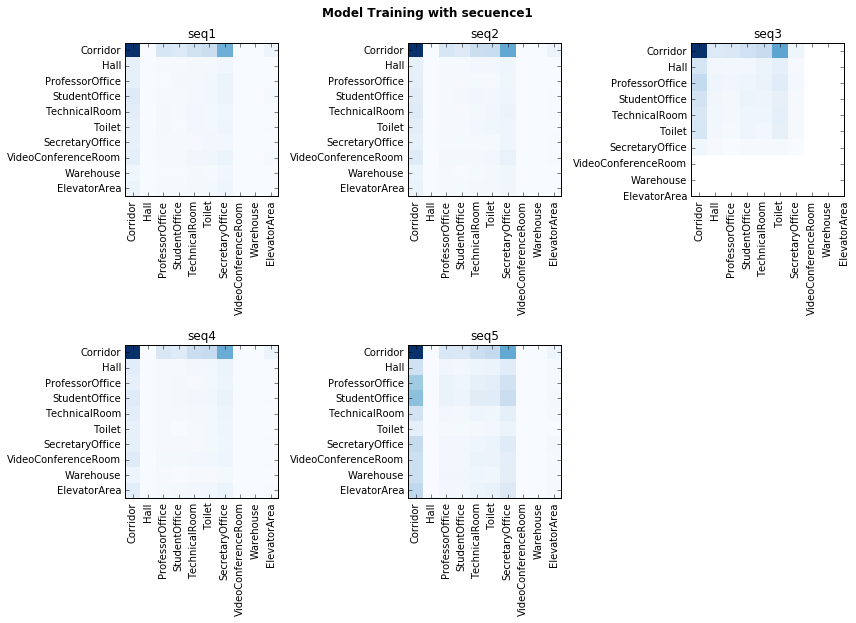

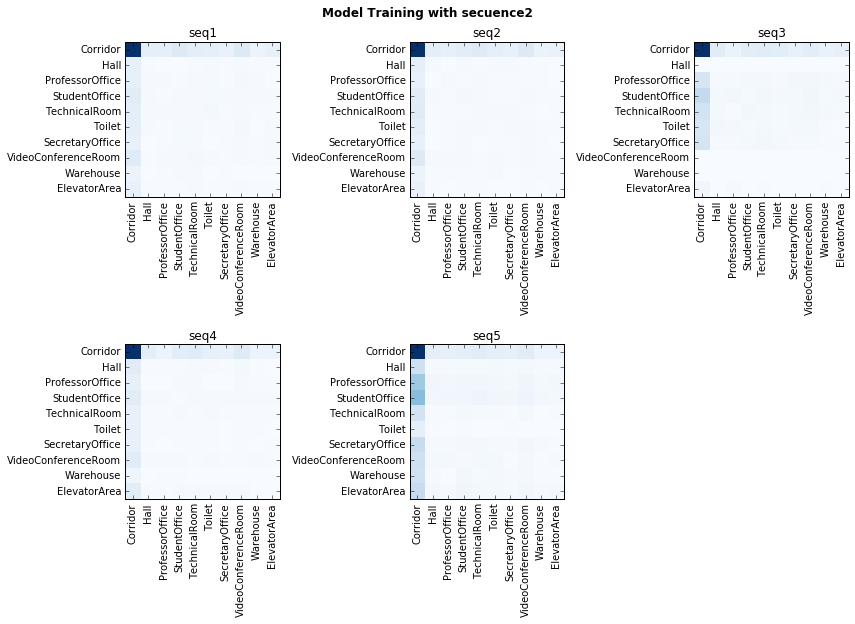

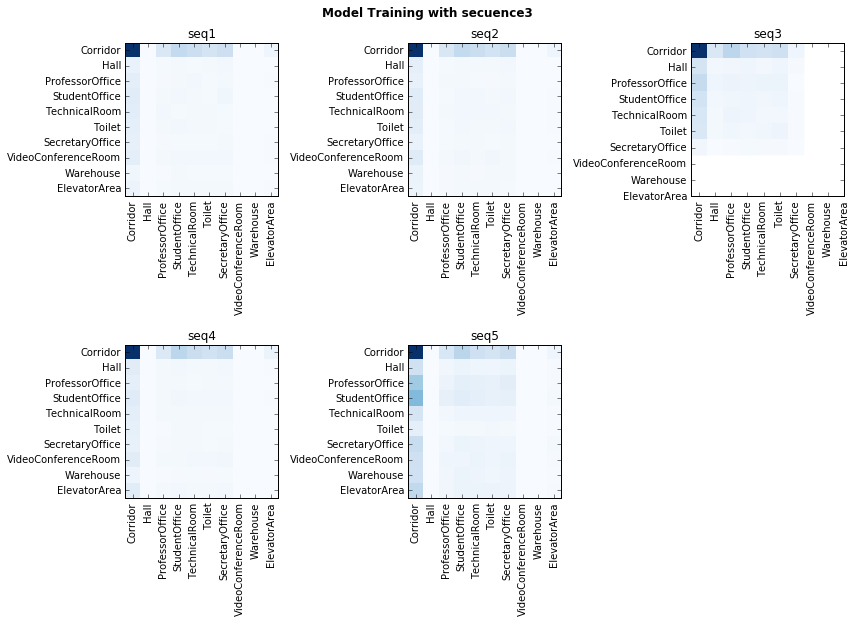

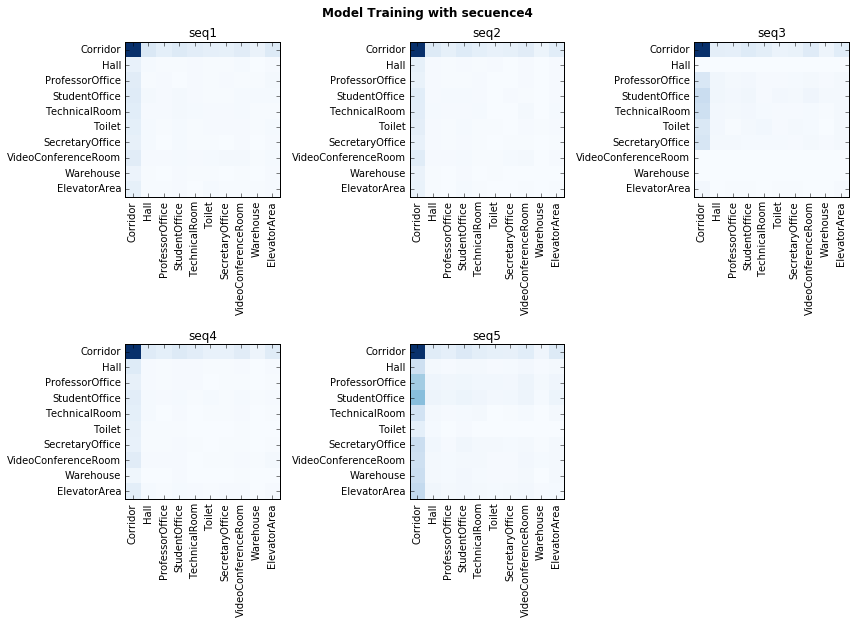

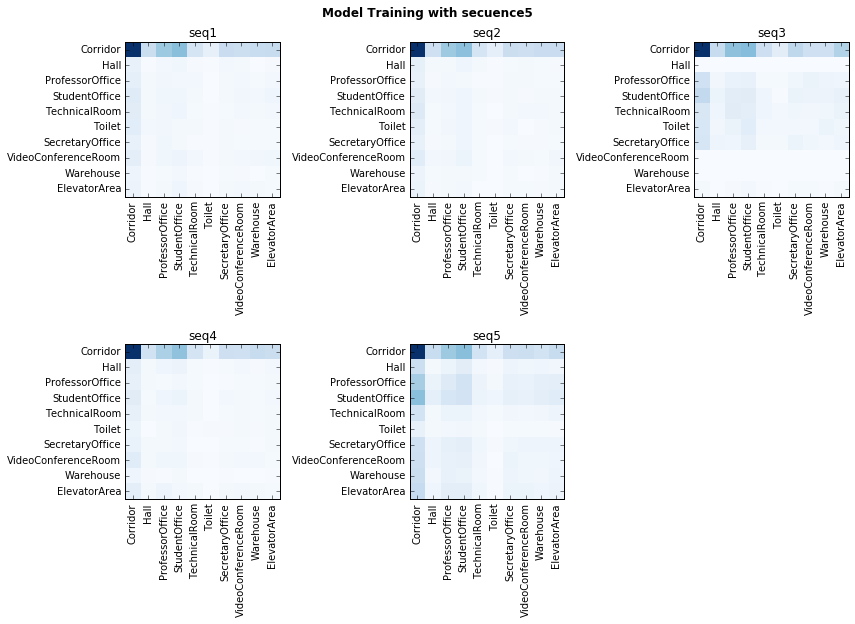

In [122]:


seq_model_label=['secuence1','secuence2','secuence3','secuence4','secuence5']
seq_dataset_label=['seq1','seq2','seq3','seq4','seq5']

evaluate(Y,seq_model_label,seq_dataset_label,class_labels)


## 1.2 Batch 50

model secuence1
 seq1:    34.0728% precision :      0.3407 recall      0.3407 f1_score      0.3407
0.340728338217
 seq2:    32.4307% precision :      0.3243 recall      0.3243 f1_score      0.3243
0.324306617165
 seq3:    29.4484% precision :      0.2945 recall      0.2945 f1_score      0.2945
0.294483985765
 seq4:    32.8637% precision :      0.3286 recall      0.3286 f1_score      0.3286
0.32863655201
 seq5:    20.9582% precision :      0.2096 recall      0.2096 f1_score      0.2096
0.209581550166
model secuence2
 seq1:    32.3566% precision :      0.3236 recall      0.3236 f1_score      0.3236
0.323566345751
 seq2:    32.8238% precision :      0.3282 recall      0.3282 f1_score      0.3282
0.328237606464
 seq3:    29.6708% precision :      0.2967 recall      0.2967 f1_score      0.2967
0.296708185053
 seq4:    31.5375% precision :      0.3154 recall      0.3154 f1_score      0.3154
0.315375051803
 seq5:    20.4945% precision :      0.2049 recall      0.2049 f1_score      0.2049
0.20

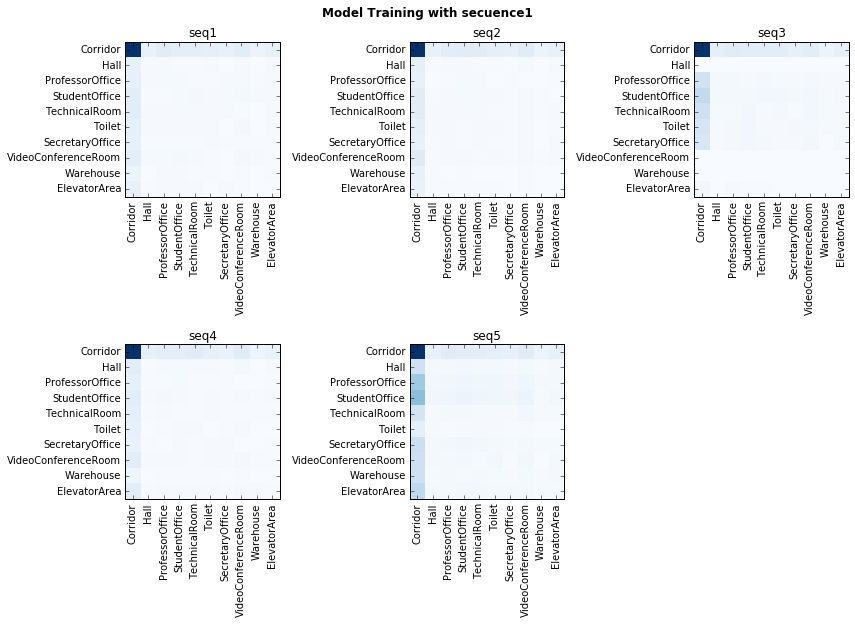

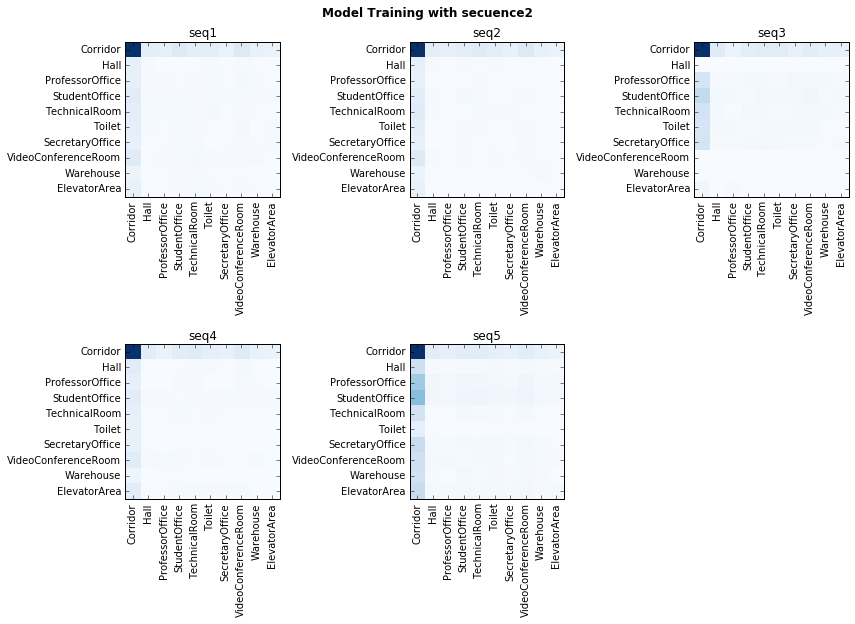

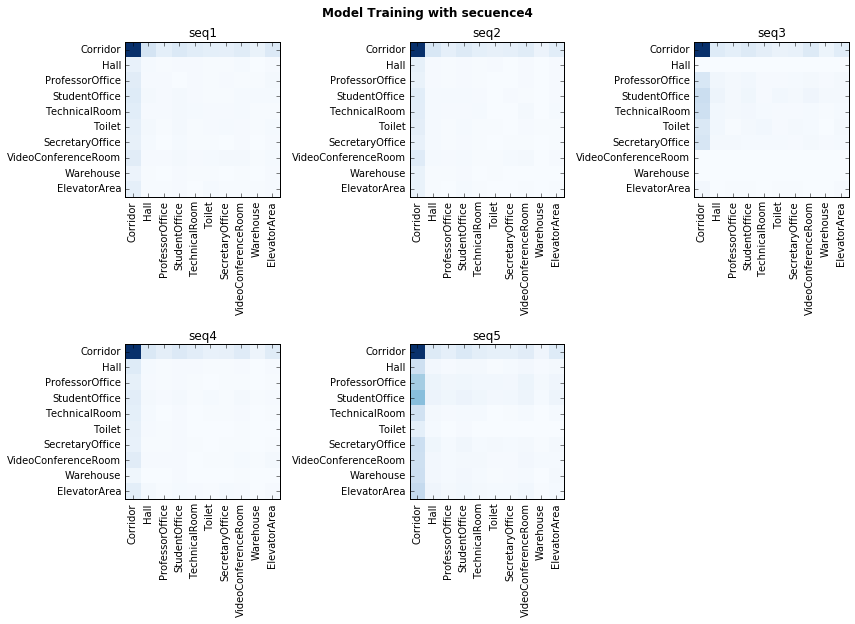

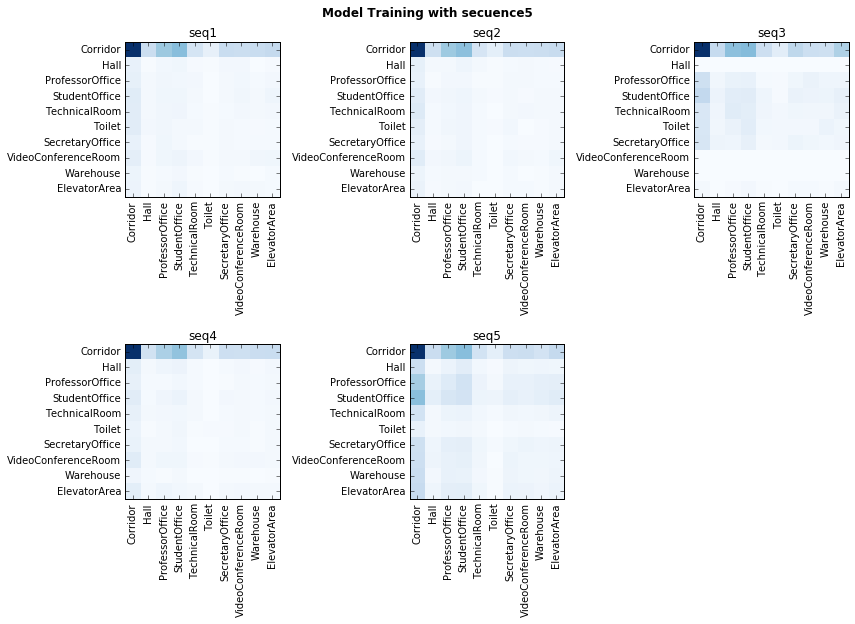

In [123]:
path="../data/results/evaluate_all_50_vs_all.pkl"
Y= load_result(path)

seq_model_label=['secuence1','secuence2','secuence4','secuence5']
seq_dataset_label=['seq1','seq2','seq3','seq4','seq5']

evaluate(Y,seq_model_label,seq_dataset_label,class_labels)

model secuence3
 seq1:    30.7660% precision :      0.3077 recall      0.3077 f1_score      0.3077
0.307660108832
 seq2:    29.8537% precision :      0.2985 recall      0.2985 f1_score      0.2985
0.298536798428
 seq3:    30.9609% precision :      0.3096 recall      0.3096 f1_score      0.3096
0.309608540925
 seq4:    29.7555% precision :      0.2976 recall      0.2976 f1_score      0.2976
0.297554910899
 seq5:    20.2449% precision :      0.2024 recall      0.2024 f1_score      0.2024
0.202448882549


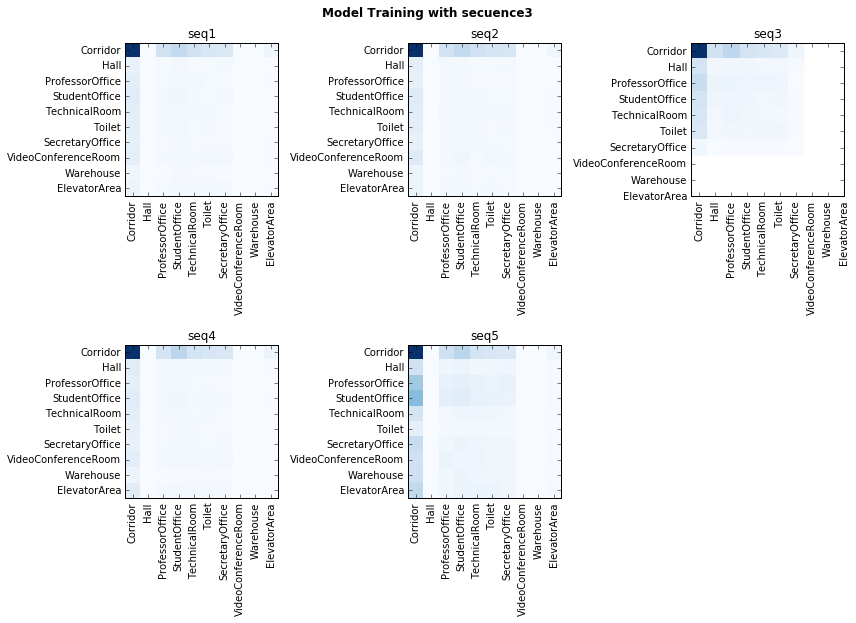

In [125]:
path="../data/results/evaluate_seq3_50_vs_all.pkl"
Y= load_result(path)

seq_model_label=['secuence3']
seq_dataset_label=['seq1','seq2','seq3','seq4','seq5']

evaluate(Y,seq_model_label,seq_dataset_label,class_labels)

## 2  Secuencia 1_4_5 vs 1 3 



model secuence3
 seq1:    26.4546% precision :      0.2645 recall      0.2645 f1_score      0.2645
0.264545835077
 seq3:    25.1779% precision :      0.2518 recall      0.2518 f1_score      0.2518
0.251779359431


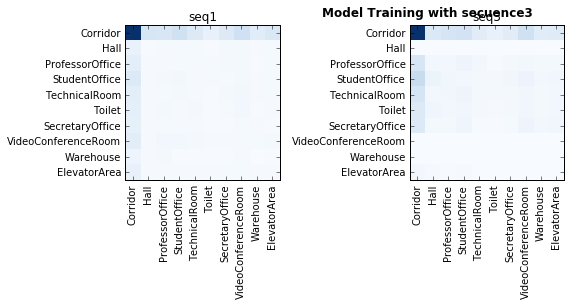

In [126]:
path="../data/results/evaluate_2_4_5_vs_1_3.pkl"
Y= load_result(path)

seq_model_label=['secuence3']
seq_dataset_label=['seq1','seq3']

evaluate(Y,seq_model_label,seq_dataset_label,class_labels)

model secuence3
 seq1:     7.5345% precision :      0.0753 recall      0.0753 f1_score      0.0753
0.0753453327752
 seq3:     7.6068% precision :      0.0761 recall      0.0761 f1_score      0.0761
0.0760676156584


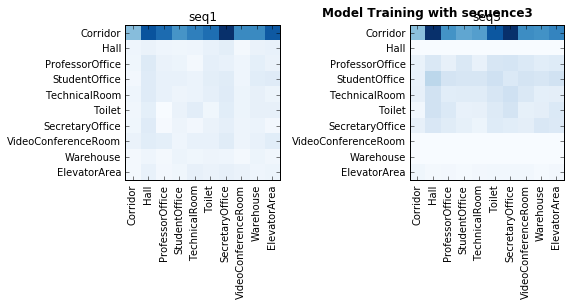

In [127]:
path="../data/results/evaluate_2_4_5_over_scikit_vs_1_3.pkl"
Y= load_result(path)

seq_model_label=['secuence3']
seq_dataset_label=['seq1','seq3']

evaluate(Y,seq_model_label,seq_dataset_label,class_labels)